<a href="https://colab.research.google.com/github/fatimasadiq/My_first_project/blob/master/Proj2SDA_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Baysian Linear Regression**
In statistics, Bayesian linear regression is an approach to linear regression in which the statistical analysis is undertaken within the context of Bayesian inference.
The model for Bayesian Linear Regression with the response sampled from a normal distribution is:
# 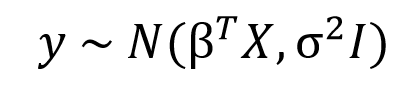

In words, our response datapoints are sampled from a multivariate normal distribution that has a mean equal to the product of the coefficients and the predictors, , and a variance of
. Here, refers to the identity matrix, which is necessary because the distribution is multivariate.

In [227]:
!pip uninstall arviz
!pip uninstall pymc3

Uninstalling pymc3-3.7:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/pymc3-3.7.dist-info/*
    /usr/local/lib/python3.6/dist-packages/pymc3/*
Proceed (y/n)? y
  Successfully uninstalled pymc3-3.7


In [1]:
!pip install arviz

In [0]:
!pip install pymc3>=3.8

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from pandas.api.types import CategoricalDtype
from plotnine import *





In [107]:
import sklearn
from sklearn.model_selection import train_test_split
import scipy
import arviz as az
import pymc3 as pm
print('Running on PyMC3 v{}'.format(pm.__version__))

Running on PyMC3 v3.8


In [64]:
#Data Reading and Examining
data=pd.read_csv('data/student-mat.csv')
data.head()
# our main target is G3 which is the final grade- we have to predict it

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [66]:
#View statistical details like percentile,mean,std etc of a data frame.
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Text(0, 0.5, 'count')

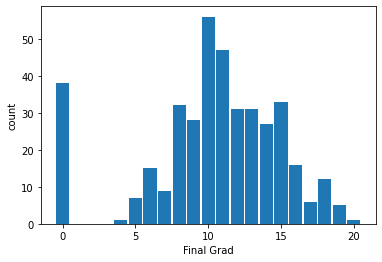

In [67]:
#Plot the distribution of various features
plt.bar(data['G3'].value_counts().index,data['G3'].value_counts().values ,width= .9)
plt.xlabel('Final Grad')
plt.ylabel ('count')

Text(0, 0.5, 'count')

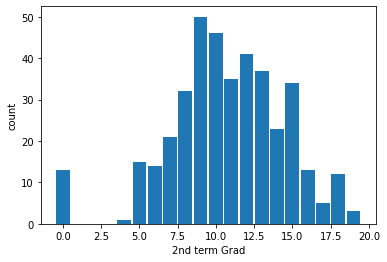

In [68]:
#Plot the distribution of various features
plt.bar(data['G2'].value_counts().index,data['G2'].value_counts().values ,width= .9)
plt.xlabel('2nd term Grad')
plt.ylabel ('count')

Text(0, 0.5, 'count')

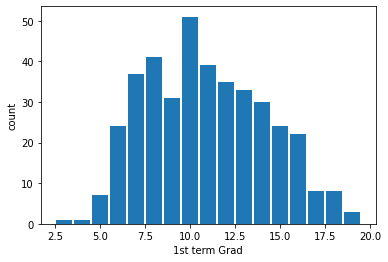

In [69]:
#Plot the distribution of various features
plt.bar(data['G1'].value_counts().index,data['G1'].value_counts().values ,width= .9)
plt.xlabel('1st term Grad')
plt.ylabel ('count')

Text(0, 0.5, 'count')

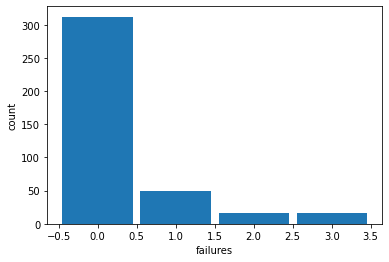

In [70]:
#Plot the distribution of various features
plt.bar(data['failures'].value_counts().index,data['failures'].value_counts().values ,width= .9)
plt.xlabel('failures')
plt.ylabel ('count')

Text(0, 0.5, 'count')

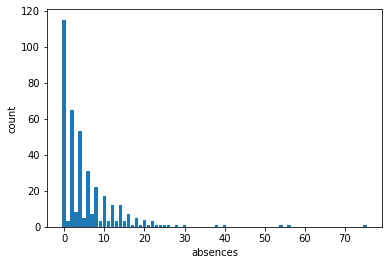

In [19]:
#Plot the distribution of various features
plt.bar(data['absences'].value_counts().index,data['absences'].value_counts().values ,width= .9)
plt.xlabel('absences')
plt.ylabel ('count')

Text(0, 0.5, 'count')

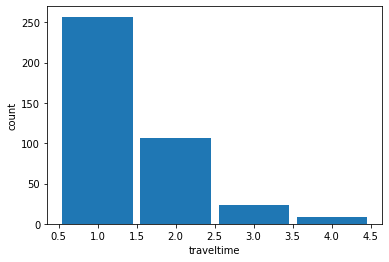

In [20]:
#Plot the distribution of various features
plt.bar(data['traveltime'].value_counts().index,data['traveltime'].value_counts().values ,width= .9)
plt.xlabel('traveltime')
plt.ylabel ('count')

Text(0, 0.5, 'count')

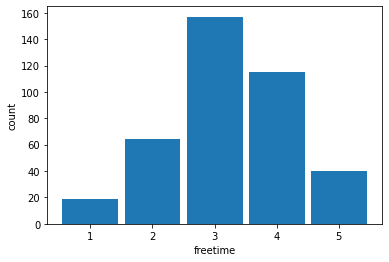

In [21]:
#Plot the distribution of various features
plt.bar(data['freetime'].value_counts().index,data['freetime'].value_counts().values ,width= .9)
plt.xlabel('freetime')
plt.ylabel ('count')

Text(0, 0.5, 'count')

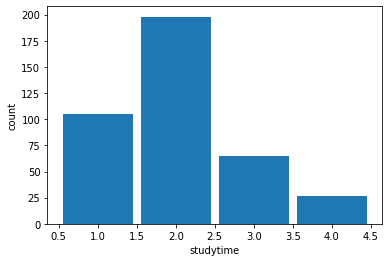

In [22]:
#Plot the distribution of various features
plt.bar(data['studytime'].value_counts().index,data['studytime'].value_counts().values ,width= .9)
plt.xlabel('studytime')
plt.ylabel ('count')

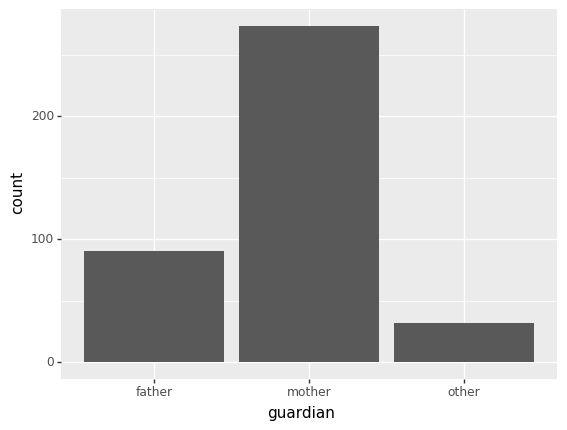

<ggplot: (8778905517302)>

In [23]:
#Plotting Categorical Variable
(ggplot(data)         # defining what data to use
 + aes(x='guardian')    # defining what variable to use
 + geom_bar(size=20) # defining the type of plot to use
)

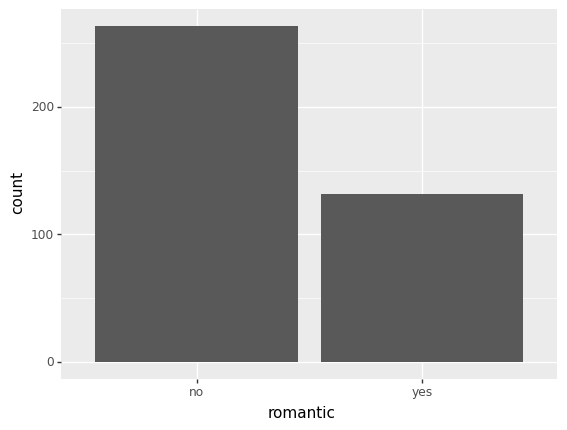

<ggplot: (8778905351965)>

In [24]:
#Plotting Categorical Variable
(ggplot(data)         # defining what data to use
 + aes(x='romantic')    # defining what variable to use
 + geom_bar(size=20) # defining the type of plot to use
)

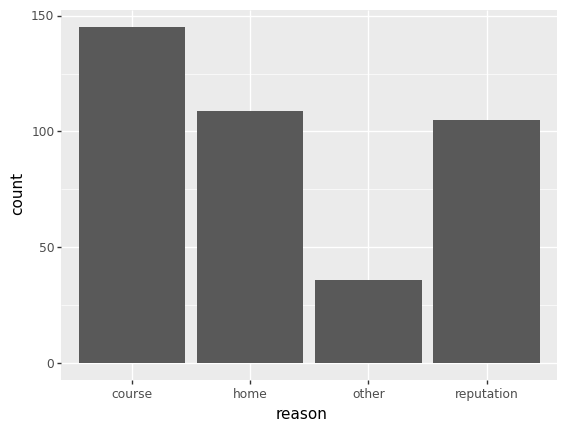

<ggplot: (8778904574633)>

In [25]:
#Plotting Categorical Variable
(ggplot(data)         # defining what data to use
 + aes(x='reason')    # defining what variable to use
 + geom_bar(size=20) # defining the type of plot to use
)

Text(0, 0.5, 'G3')

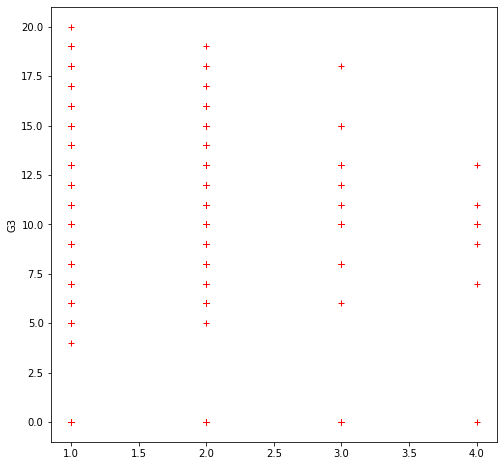

In [26]:
#plot relationship between absences and final grade which is G3
plt.figure(figsize=(8, 8))
plt.plot(data['traveltime'] ,data['G3'] , 'r+')
plt.xlabel('')
plt.ylabel('G3')

Text(0, 0.5, 'G3')

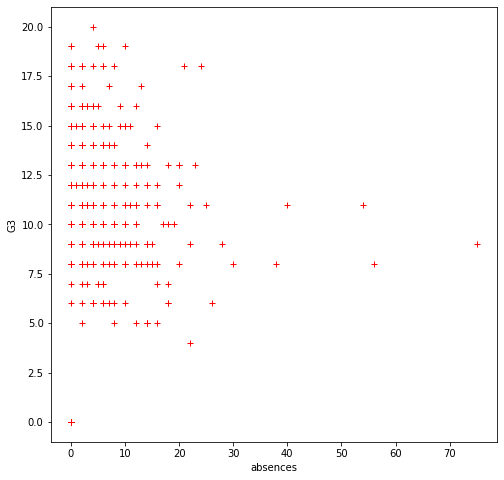

In [27]:
#plot relationship between absences and final grade which is G3
plt.figure(figsize=(8, 8))
plt.plot(data['absences'] ,data['G3'] , 'r+')
plt.xlabel('absences')
plt.ylabel('G3')

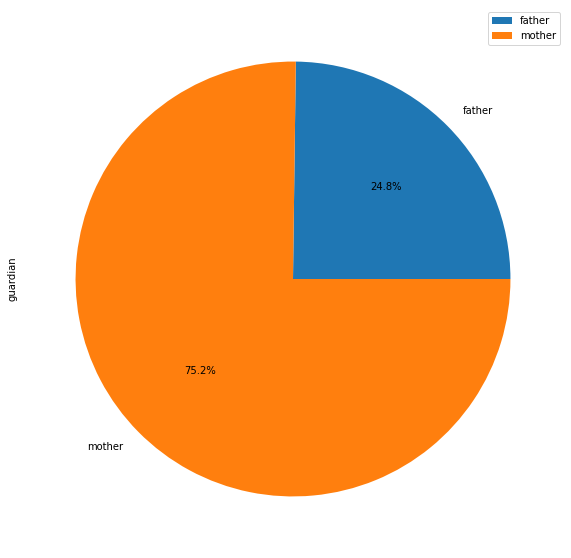

In [28]:
type_counts = data['guardian'].value_counts()
df2 = pd.DataFrame({'guardian': type_counts}, 
                     index = ['father', 'mother']
                   )
df2.plot.pie(y='guardian', figsize=(10,10), autopct='%1.1f%%')

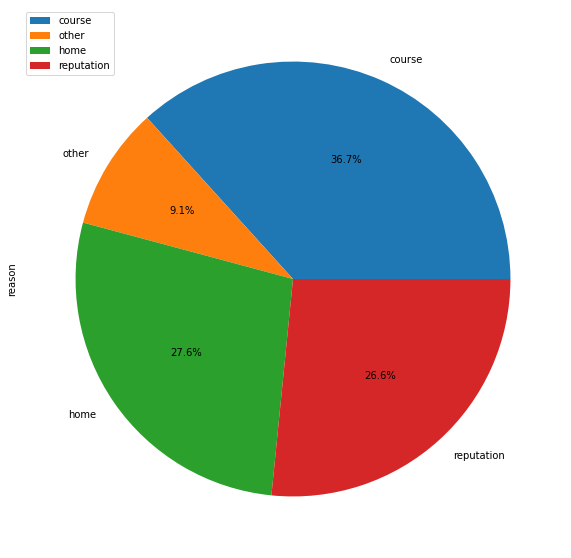

In [29]:
type_counts = data['reason'].value_counts()
df2 = pd.DataFrame({'reason': type_counts}, 
                     index = ['course', 'other' , 'home', 'reputation']
                   )
df2.plot.pie(y='reason', figsize=(10,10), autopct='%1.1f%%') 

In [73]:
#Calculate feature correlation with final grade for both categorical and numerical values
# to find correlation of categorical data we need to convert categorical data into numeric data

data['school'] =data['school'].astype('category').cat.codes
data['sex'] =data['sex'].astype('category').cat.codes
data['address'] =data['address'].astype('category').cat.codes
data['famsize'] =data['famsize'].astype('category').cat.codes
data['Pstatus'] =data['Pstatus'].astype('category').cat.codes
data['Medu'] =data['Medu'].astype('category').cat.codes
data['Fedu'] =data['Fedu'].astype('category').cat.codes
data['schoolsup'] =data['schoolsup'].astype('category').cat.codes
data['famsup'] =data['famsup'].astype('category').cat.codes
data['reason'] =data['reason'].astype('category').cat.codes
data['guardian'] =data['guardian'].astype('category').cat.codes
data['paid'] =data['paid'].astype('category').cat.codes
data['activities'] =data['activities'].astype('category').cat.codes
data['nursery'] =data['nursery'].astype('category').cat.codes
data['higher'] =data['higher'].astype('category').cat.codes
data['internet'] =data['internet'].astype('category').cat.codes
data['romantic'] =data['romantic'].astype('category').cat.codes

# now finding correlation
data[['school' ,'sex','age' ,'address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian','traveltime','studytime','failures','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic','famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2']].corrwith(data['G3']).abs()

school        0.045017
sex           0.103456
age           0.161579
address       0.105756
famsize       0.081407
Pstatus       0.058009
Medu          0.217147
Fedu          0.152457
reason        0.121994
guardian      0.070109
traveltime    0.117142
studytime     0.097820
failures      0.360415
schoolsup     0.082788
famsup        0.039157
paid          0.101996
activities    0.016100
nursery       0.051568
higher        0.182465
internet      0.098483
romantic      0.129970
famrel        0.051363
freetime      0.011307
goout         0.132791
Dalc          0.054660
Walc          0.051939
health        0.061335
absences      0.034247
G1            0.801468
G2            0.904868
dtype: float64

In [0]:
# now finding correlation
correlation_matrix=data[['school' ,'sex','age' ,'address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian','traveltime','studytime','failures','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic','famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2']].corrwith(data['G3']).abs()

In [76]:
data.corr()['G3'].sort_values()

failures     -0.360415
age          -0.161579
goout        -0.132791
romantic     -0.129970
traveltime   -0.117142
schoolsup    -0.082788
guardian     -0.070109
health       -0.061335
Pstatus      -0.058009
Dalc         -0.054660
Walc         -0.051939
school       -0.045017
famsup       -0.039157
freetime      0.011307
activities    0.016100
absences      0.034247
famrel        0.051363
nursery       0.051568
famsize       0.081407
studytime     0.097820
internet      0.098483
paid          0.101996
sex           0.103456
address       0.105756
reason        0.121994
Fedu          0.152457
higher        0.182465
Medu          0.217147
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64

In [0]:
correlationoutput=data.corr()['G3'].sort_values()

In [0]:
def top_correlation (ary,N):
  corrsort=sorted(ary , reverse=True)[:N]

  return corrsort
 

In [79]:
top_correlation(correlation_matrix , 10)

[0.9048679892693009,
 0.8014679320174146,
 0.3604149404616497,
 0.21714749613860598,
 0.18246461785815765,
 0.16157943813834058,
 0.15245693890425902,
 0.13279147350332923,
 0.12996995016344978,
 0.12199410591813471]

In [0]:
#most correlated features are (failures,Medu,Higher,age,Fedu,goout,romantic,reason,absences,studytime)
target = data['G3']
f = data.drop(columns=['school', 'G1', 'G2', 'sex','address','famsize','Pstatus','Mjob','Fjob','guardian','traveltime','schoolsup','famsup','paid','activities','nursery','internet','famrel','Dalc','Walc','health'])             
X_train, X_test, y_train, y_test = train_test_split(f,target, test_size=0.25, random_state=42)

In [84]:
X_train.tail()

,age,Medu,Fedu,reason,studytime,failures,higher,romantic,freetime,goout,absences,G3
71,15,4,2,0,4,0,1,0,3,3,0,10
106,15,2,2,0,4,0,1,0,1,2,8,8
270,19,3,3,1,2,2,1,0,3,5,15,9
348,17,4,3,3,3,0,1,1,4,3,0,15
102,15,4,4,0,1,0,1,0,3,3,4,14


In [85]:
X_test.head()

,age,Medu,Fedu,reason,studytime,failures,higher,romantic,freetime,goout,absences,G3
78,17,2,1,1,1,3,0,0,5,1,2,10
371,18,1,2,2,1,0,0,1,3,3,3,12
248,18,3,3,0,2,1,1,1,3,3,8,5
55,16,2,1,2,2,0,1,1,3,4,8,10
390,20,2,2,0,2,2,1,0,5,4,11,9


In [0]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor



Gradient Boosted Performance on the test set: MAE = 0.0039
Gradient Boosted Performance on the test set: RMSE = 0.0359
Random forest Performance on the test set : MAE = 0.0185
Random forest Performance on the test set : RMSE = 0.0511
Extra Trees Performance on the test set : MAE = 0.0174
Extra Trees Performance on the test set : RMSE = 0.0635
Linear Regression Performance on the test set : MAE = 0.0000
Linear Regression Performance on the test set : RMSE = 0.0000
Support Vector Machine Performance on the test set : MAE = 0.2701
Support Vecor Machine Performance on the test set : RMSE = 0.4364
K Neighbor Performance on the test set : MAE = 0.6848
K Neighbor Performance on the test set : RMSE = 0.9094


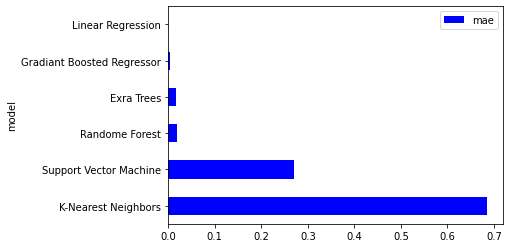

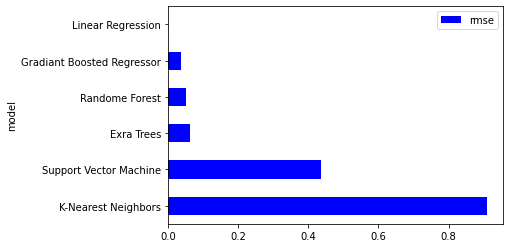

In [87]:
def evaluatemodels(X_train,X_test,y_train,y_test):
  #Gradiant Booster first model
  gradient_boosted = GradientBoostingRegressor()
  gradient_boosted.fit(X_train, y_train)
  predictions = gradient_boosted.predict(X_test)
  mae1 = np.mean(abs(predictions - y_test))
  rmse1 = np.sqrt(np.mean((predictions - y_test) ** 2))
  print('Gradient Boosted Performance on the test set: MAE = %0.4f' %mae1)
  print('Gradient Boosted Performance on the test set: RMSE = %0.4f' % rmse1)
  #Random Forest 2nd Model
  random_forest=RandomForestRegressor()
  random_forest.fit(X_train,y_train)
  predictions1 = random_forest.predict(X_test)
  mae2 = np.mean(abs(predictions1 - y_test))
  rmse2 = np.sqrt(np.mean((predictions1- y_test)**2))
  print('Random forest Performance on the test set : MAE = %0.4f' %mae2)
  print ('Random forest Performance on the test set : RMSE = %0.4f' %rmse2)
  #Extra Trees 3rd Model
  extra_trees=ExtraTreesRegressor()
  extra_trees.fit(X_train,y_train)
  predictions2 = extra_trees.predict(X_test)
  mae3 = np.mean(abs(predictions2 - y_test))
  rmse3 = np.sqrt(np.mean((predictions2- y_test)**2))
  print('Extra Trees Performance on the test set : MAE = %0.4f' %mae3)
  print ('Extra Trees Performance on the test set : RMSE = %0.4f' %rmse3)
  #Linear Regression 4th Model
  linear_regression=LinearRegression()
  linear_regression.fit(X_train,y_train)
  predictions3 = linear_regression.predict(X_test)
  mae4 = np.mean(abs(predictions3 - y_test))
  rmse4 = np.sqrt(np.mean((predictions3- y_test)**2))
  print('Linear Regression Performance on the test set : MAE = %0.4f' %mae4)
  print ('Linear Regression Performance on the test set : RMSE = %0.4f' %rmse4)
  #Support Vector Machine 5th Model
  support_vector=SVR()
  support_vector.fit(X_train,y_train)
  predictions4 = support_vector.predict(X_test)
  mae5 = np.mean(abs(predictions4 - y_test))
  rmse5 = np.sqrt(np.mean((predictions4- y_test)**2))
  print('Support Vector Machine Performance on the test set : MAE = %0.4f' %mae5)
  print ('Support Vecor Machine Performance on the test set : RMSE = %0.4f' %rmse5)
  #K-Neighbor Regressor
  k_neighbor=KNeighborsRegressor()
  k_neighbor.fit(X_train,y_train)
  predictions5 = k_neighbor.predict(X_test)
  mae6 = np.mean(abs(predictions5 - y_test))
  rmse6 = np.sqrt(np.mean((predictions5- y_test)**2))
  print('K Neighbor Performance on the test set : MAE = %0.4f' %mae6)
  print ('K Neighbor Performance on the test set : RMSE = %0.4f' %rmse6)

  # Dataframe to hold the results
  model_comparison = pd.DataFrame({'model': ['Gradiant Boosted Regressor','Randome Forest','Exra Trees','Linear Regression', 'Support Vector Machine','K-Nearest Neighbors'],
                                 'mae': [mae1 , mae2 , mae3, mae4 , mae5 , mae6],
                                  'rmse': [rmse1 , rmse2 , rmse3 ,rmse4, rmse5 ,rmse6]})
  model_comparison

  # Horizontal bar chart of test mae
  model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'blue')
  # Horizontal bar chart of test rmse
  model_comparison.sort_values('rmse', ascending = False).plot(x = 'model', y = 'rmse', kind = 'barh',
                                                           color = 'blue')

evaluatemodels(X_train,X_test,y_train,y_test)

Gradient Boosted Performance on the test set: MAE = 0.0043
Gradient Boosted Performance on the test set: RMSE = 0.0374
Random forest Performance on the test set : MAE = 0.0195
Random forest Performance on the test set : RMSE = 0.0522
Extra Trees Performance on the test set : MAE = 0.0204
Extra Trees Performance on the test set : RMSE = 0.0717
Linear Regression Performance on the test set : MAE = 0.0000
Linear Regression Performance on the test set : RMSE = 0.0000
Support Vector Machine Performance on the test set : MAE = 0.2701
Support Vecor Machine Performance on the test set : RMSE = 0.4364
K Neighbor Performance on the test set : MAE = 0.6848
K Neighbor Performance on the test set : RMSE = 0.9094


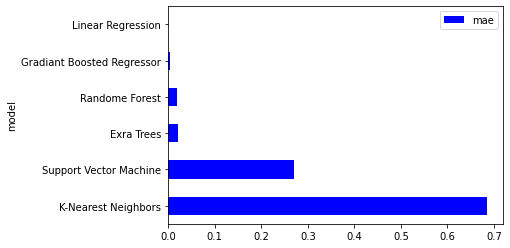

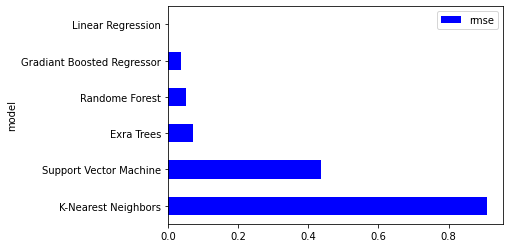

In [88]:
evaluatemodels(X_train,X_test,y_train,y_test)

In [91]:
#Implementation of Bayesian Linear Regression Results
with pm.Model() as linear_model:
    # Intercept
    intercept = pm.Normal('Intercept', mu = 0, sd = 10)
    
    # Slope 
    slope = pm.Normal('slope', mu = 0, sd = 10)
    
    # Standard deviation
    sigma = pm.HalfNormal('sigma', sd = 10)
    
    # Estimate of mean
    mean = intercept + slope * X_train.loc[:, 'G3']
    
    # Observed values
    Y_obs = pm.Normal('Y_obs', mu = mean, sd = sigma, observed = y_train.values)
    
    # Sampler
    step = pm.NUTS()

    # Posterior distribution

    linear_trace = pm.sample(500, step)

Sequential sampling (2 chains in 1 job)
NUTS: [sigma, slope, Intercept]
Sampling chain 1, 165 divergences: 100%|██████████| 1000/1000 [00:07<00:00, 141.84it/s]
There were 255 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.05378624304831401, but should be close to 0.8. Try to increase the number of tuning steps.
There were 420 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.1046690258513835, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbff40fe9b0>,
      dtype=object)

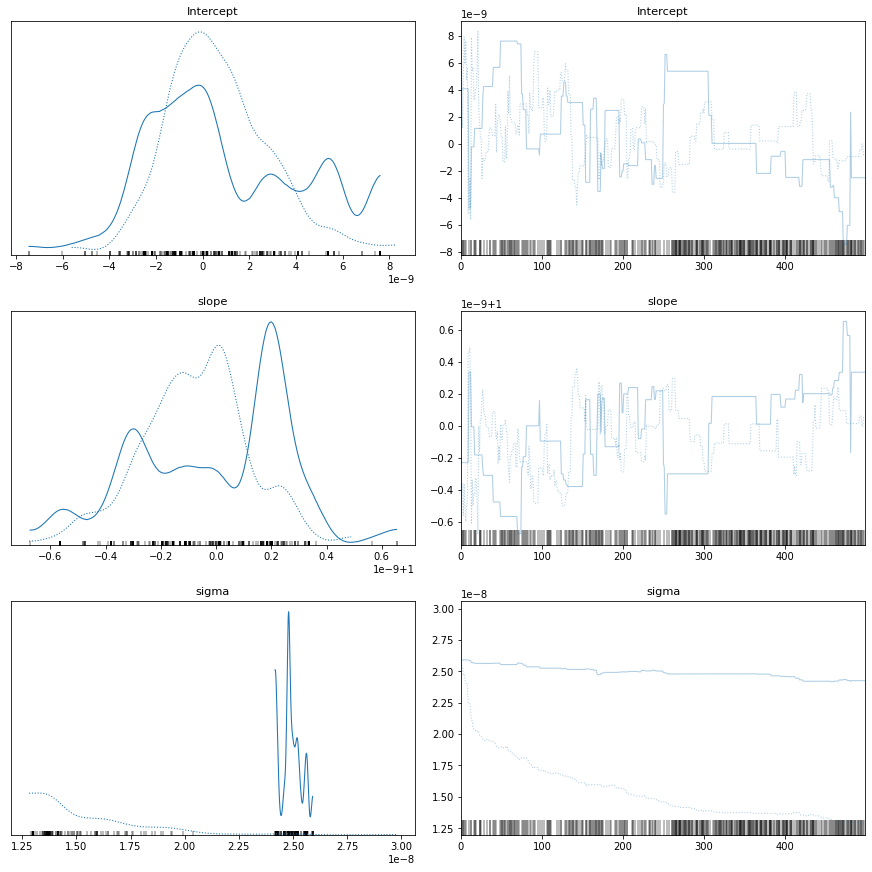

In [93]:
#!pip3 install pymc3>=3.8
pm.traceplot(linear_trace , figsize = (12, 12))



array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbfe69fdb38>,
      dtype=object)

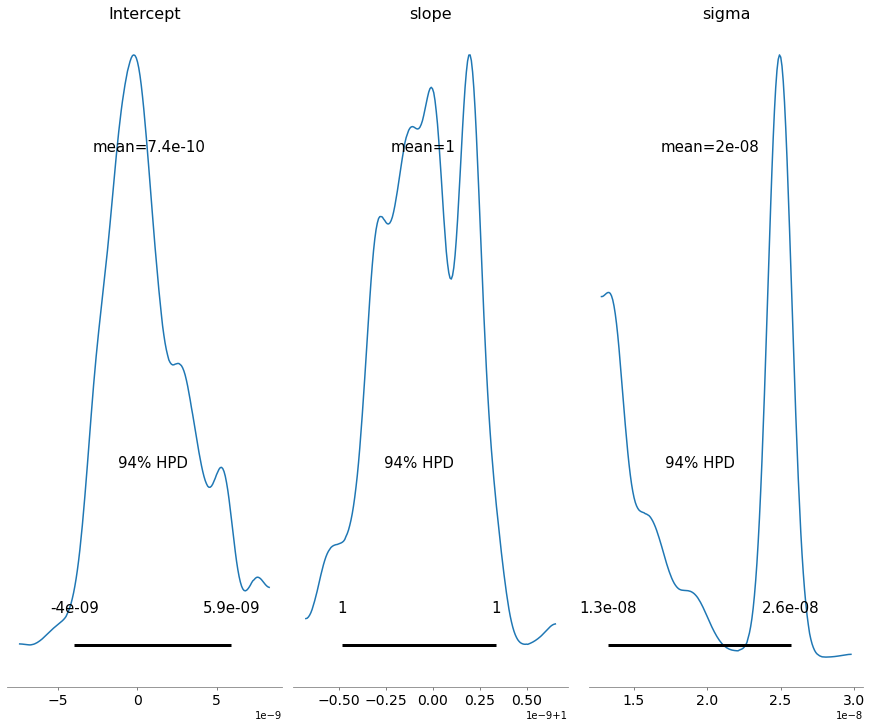

In [96]:
pm.plot_posterior(linear_trace, figsize = (12, 10))

In [99]:
formula = 'G3 ~ ' + ' + '.join(['%s' % variable for variable in X_train.columns[1:]])
formula

'G3 ~ Medu + Fedu + reason + studytime + failures + higher + romantic + freetime + goout + absences + G3'

In [101]:
with pm.Model() as normal_model:
    
    # The prior for the model parameters will be a normal distribution
    family = pm.glm.families.Normal()
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = X_train, family = family)
    
    # Perform Markov Chain Monte Carlo sampling
    normal_trace = pm.sample(draws=2000, chains = 2, tune = 500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
Sequential sampling (2 chains in 1 job)
NUTS: [sd, G3, absences, goout, freetime, romantic, higher, failures, studytime, reason, Fedu, Medu, Intercept]
Sampling chain 1, 1,293 divergences: 100%|██████████| 2500/2500 [00:24<00:00, 101.55it/s]
There were 1274 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.11248902743440611, but should be close to 0.8. Try to increase the number of tuning steps.
There were 2567 divergences after tuning. Increase `target_accept` or reparameteriz

In [0]:
# Shows the trace with a vertical line at the mean of the trace
def plot_trace(trace):
    # Traceplot with vertical lines at the mean value
    ax = pm.traceplot(trace, figsize=(14, len(trace.varnames)*1.8),
                      lines={k: v['mean'] for k, v in pm.df_summary(trace).iterrows()})
    
    matplotlib.rcParams['font.size'] = 16
    
    # Labels with the median value
    for i, mn in enumerate(pm.df_summary(trace)['mean']):
        ax[i, 0].annotate('{:0.2f}'.format(mn), xy = (mn, 0), xycoords = 'data', size = 8,
                          xytext = (-18, 18), textcoords = 'offset points', rotation = 90,
                          va = 'bottom', fontsize = 'large', color = 'red')



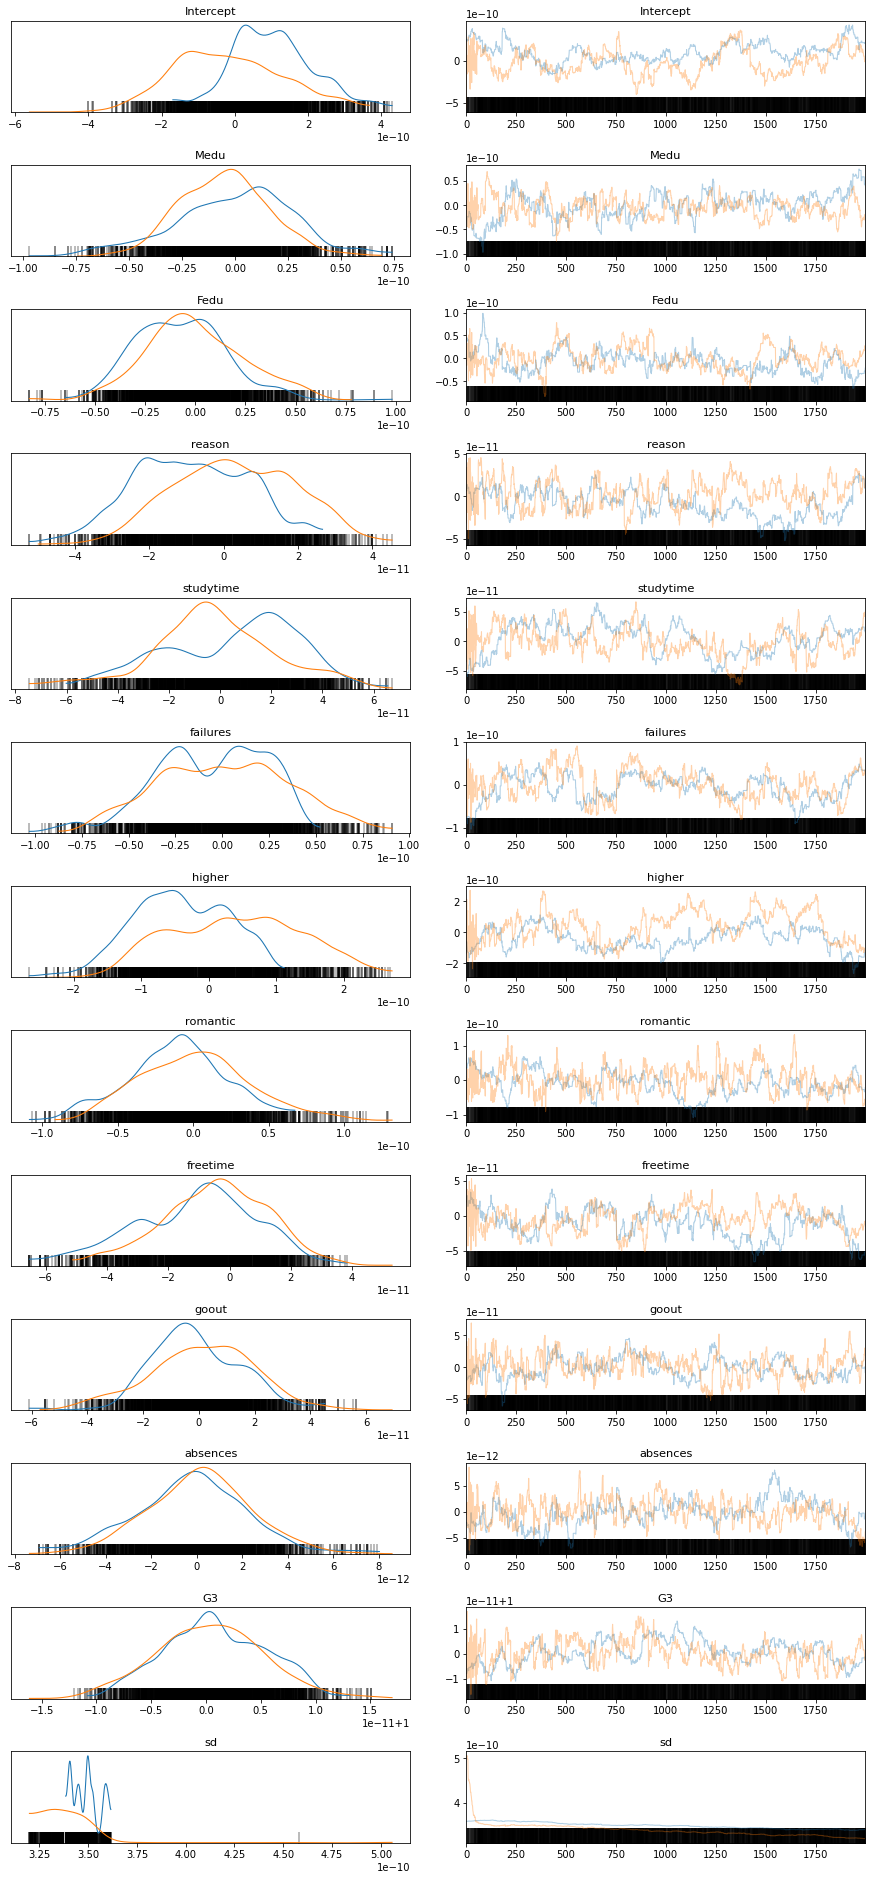

In [108]:


az.plot_trace(normal_trace);



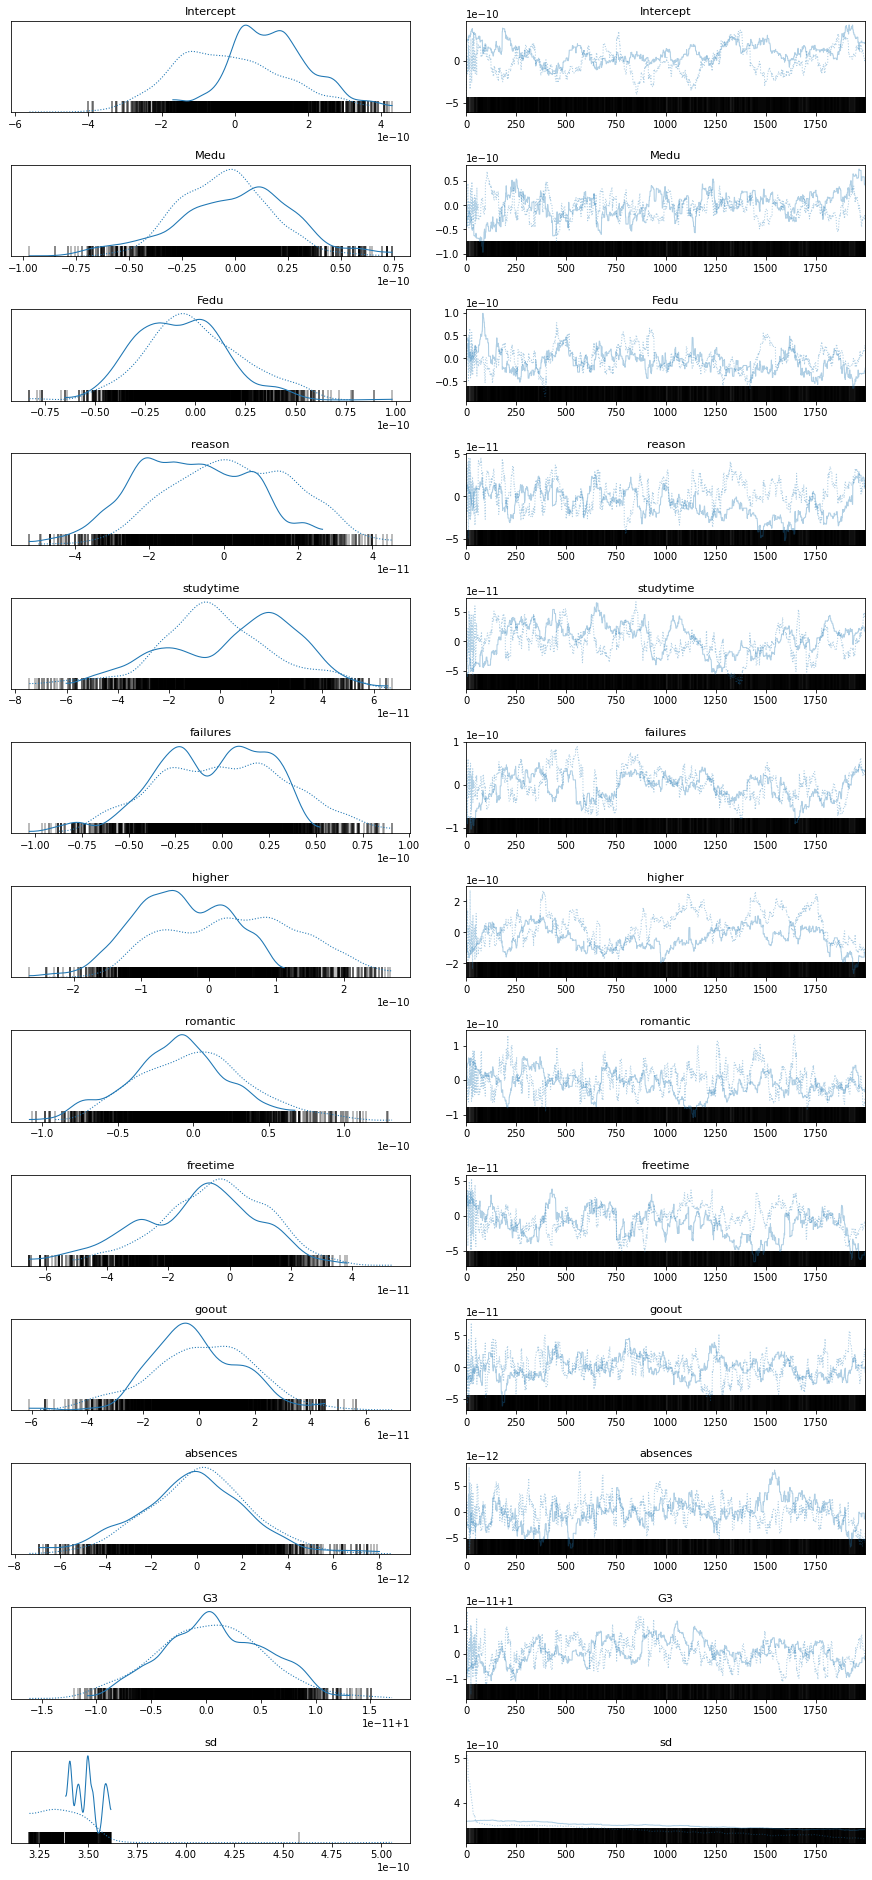

In [109]:


pm.traceplot(normal_trace);



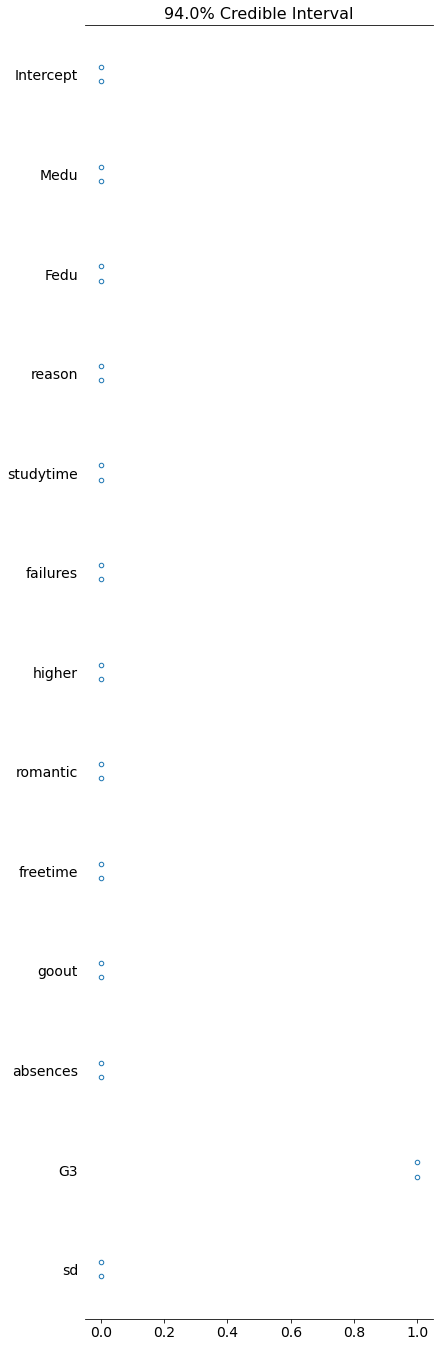

In [110]:
pm.forestplot(normal_trace);

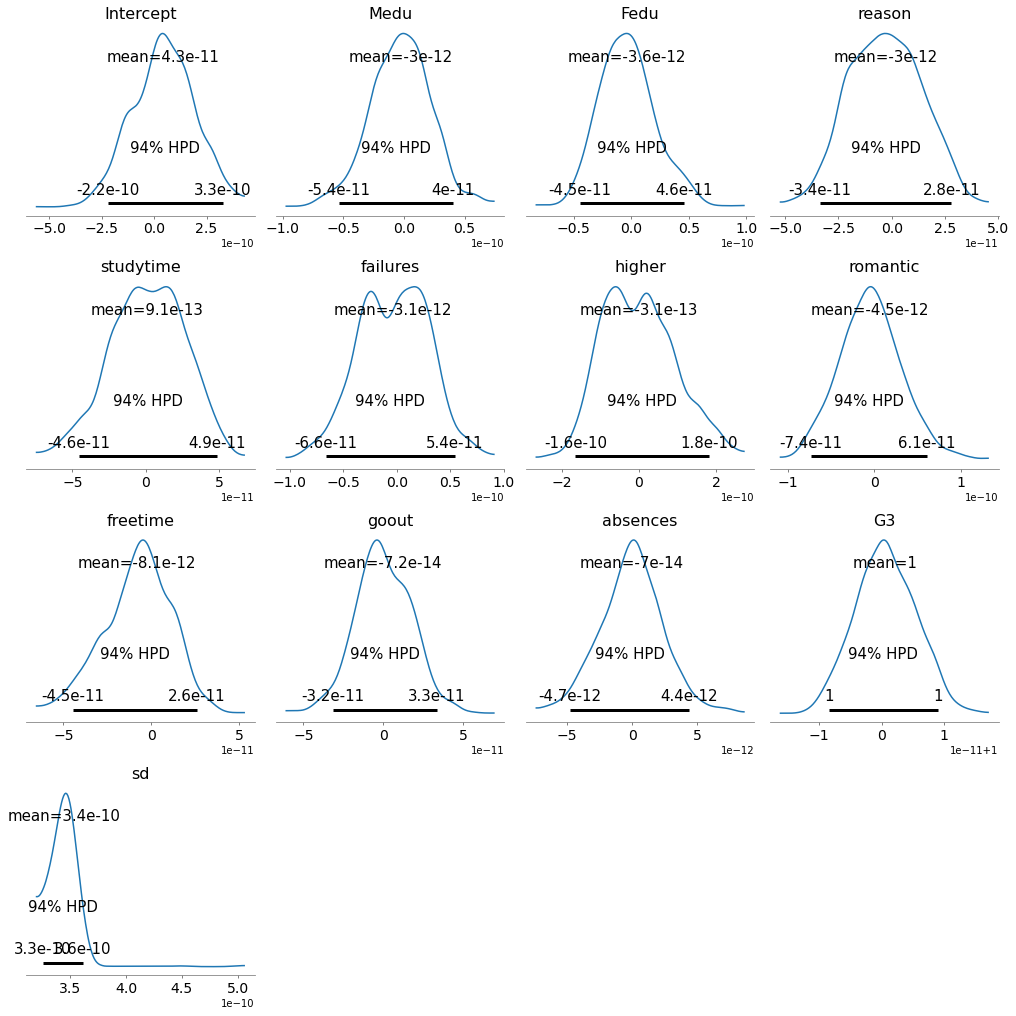

In [112]:
pm.plot_posterior(normal_trace, figsize = (14, 14));

In [124]:
# Print out the mean variable weight from the trace
for variable in normal_trace.varnames:
    print('Variable: {:15} Mean weight in model: {:.4f}'.format(variable, 
                                                                np.mean(normal_trace[variable])))

Variable: Intercept       Mean weight in model: 0.0000
Variable: Medu            Mean weight in model: -0.0000
Variable: Fedu            Mean weight in model: -0.0000
Variable: reason          Mean weight in model: -0.0000
Variable: studytime       Mean weight in model: 0.0000
Variable: failures        Mean weight in model: -0.0000
Variable: higher          Mean weight in model: -0.0000
Variable: romantic        Mean weight in model: -0.0000
Variable: freetime        Mean weight in model: -0.0000
Variable: goout           Mean weight in model: -0.0000
Variable: absences        Mean weight in model: -0.0000
Variable: G3              Mean weight in model: 1.0000
Variable: sd_log__        Mean weight in model: -21.7906
Variable: sd              Mean weight in model: 0.0000


In [125]:
pm.summary(normal_trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept,0.0,0.0,-0.0,0.0,0.0,0.0,17.0,17.0,18.0,92.0,1.15
Medu,-0.0,0.0,-0.0,0.0,0.0,0.0,31.0,31.0,33.0,38.0,1.09
Fedu,-0.0,0.0,-0.0,0.0,0.0,0.0,59.0,59.0,59.0,140.0,1.06
reason,-0.0,0.0,-0.0,0.0,0.0,0.0,9.0,9.0,9.0,45.0,1.19
studytime,0.0,0.0,-0.0,0.0,0.0,0.0,23.0,23.0,24.0,65.0,1.09
failures,-0.0,0.0,-0.0,0.0,0.0,0.0,47.0,47.0,48.0,45.0,1.04
higher,-0.0,0.0,-0.0,0.0,0.0,0.0,9.0,9.0,9.0,51.0,1.19
romantic,-0.0,0.0,-0.0,0.0,0.0,0.0,20.0,20.0,19.0,62.0,1.09
freetime,-0.0,0.0,-0.0,0.0,0.0,0.0,20.0,20.0,20.0,69.0,1.12
goout,-0.0,0.0,-0.0,0.0,0.0,0.0,71.0,71.0,70.0,123.0,1.03


In [126]:


model_formula = 'G3 = '
for variable in normal_trace.varnames:
    model_formula += ' %0.2f * %s +' % (np.mean(normal_trace[variable]), variable)

' '.join(model_formula.split(' ')[:-1])



'G3 =  0.00 * Intercept + -0.00 * Medu + -0.00 * Fedu + -0.00 * reason + 0.00 * studytime + -0.00 * failures + -0.00 * higher + -0.00 * romantic + -0.00 * freetime + -0.00 * goout + -0.00 * absences + 1.00 * G3 + -21.79 * sd_log__ + 0.00 * sd'

In [0]:
# Evalute the MCMC trace and compare to ml models
def evaluate_trace(trace, X_train, X_test, y_train, y_test):
    
    # Dictionary of all sampled values for each parameter
    var_dict = {}
    for variable in trace.varnames:
        var_dict[variable] = trace[variable]
        
    # Results into a dataframe
    var_weights = pd.DataFrame(var_dict)
    
    # Means for all the weights
    var_means = var_weights.mean(axis=0)
    
    # Create an intercept column
    X_test['Intercept'] = 1
    
    # Align names of the test observations and means
    names = X_test.columns[1:]
    X_test = X_test.loc[:, names]
    var_means = var_means[names]
    
    # Calculate estimate for each test observation using the average weights
    results = pd.DataFrame(index = X_test.index, columns = ['estimate'])

    for row in X_test.iterrows():
        results.loc[row[0], 'estimate'] = np.dot(np.array(var_means), np.array(row[1]))
        
    # Metrics 
    actual = np.array(y_test)
    errors = results['estimate'] - actual
    mae = np.mean(abs(errors))
    rmse = np.sqrt(np.mean(errors ** 2))
    
    print('Model  MAE: {:.4f}\nModel RMSE: {:.4f}'.format(mae, rmse))
    
    # Add the results to the comparison dataframe
    #model_results.ix['Bayesian LR', :] = [mae, rmse]
    
    #plt.figure(figsize=(12, 8))
    
    # Plot median absolute percentage error of all models
    #ax = plt.subplot(1, 2, 1)
    #model_results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'r', ax = ax)
    #plt.title('Model Mean Absolute Error Comparison'); plt.ylabel('MAE'); 
    #plt.tight_layout()
    
    # Plot root mean squared error of all models
    #ax = plt.subplot(1, 2, 2)
    #model_results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'b', ax = ax)
    #plt.title('Model RMSE Comparison'); plt.ylabel('RMSE')
    
   

In [135]:
all_model_results = evaluate_trace(normal_trace, X_train, X_test, y_train, y_test)

Model  MAE: 0.0000
Model RMSE: 0.0000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
